In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
pd_data = pd.read_csv(url, header=None)
pd_data.columns = ['구매가', '유지비용', '문개수', '탑승인원', '수납공간', '안전도', '만족도']
pd_data

,구매가,유지비용,문개수,탑승인원,수납공간,안전도,만족도
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


* 구매가가 만족도에 미치는 영항

* 수납공간이 크면 탑승인원도 많은가

C:\Users\ITPS\AppData\Local\Temp\ipykernel_3300\318786983.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  axe.scatter(pd_data['구매가'], pd_data['만족도'], s=5, c='red', vmin=0, vmax=100)


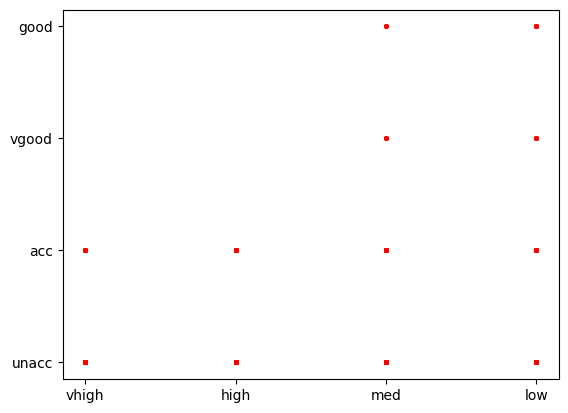

In [3]:
_, axe = plt.subplots()
axe.scatter(pd_data['구매가'], pd_data['만족도'], s=5, c='red', vmin=0, vmax=100)





      구매가    만족도  안전도
4     low  unacc  258
2     low    acc   89
3     low   good   46
5     low  vgood   39
8     med  unacc  268
6     med    acc  115
7     med   good   23
9     med  vgood   26
1    high  unacc  324
0    high    acc  108
11  vhigh  unacc  360
10  vhigh    acc   72


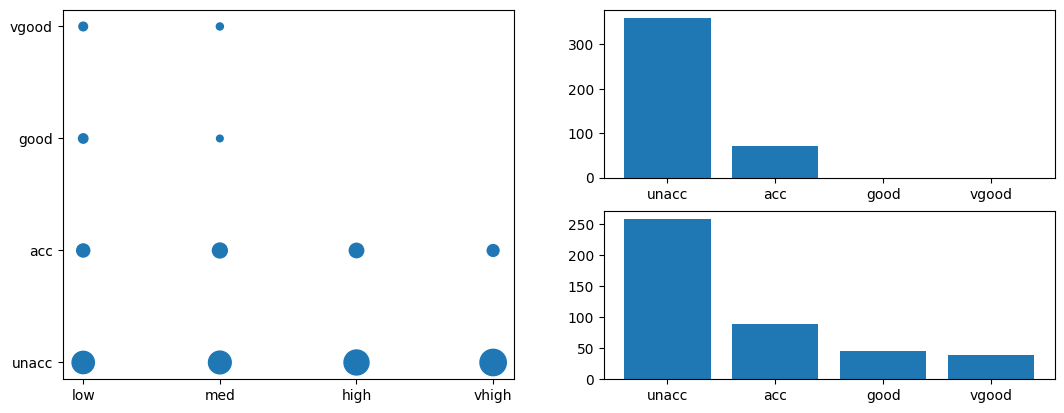

In [42]:
fig = plt.figure(figsize=(6.4*2, 4.8))
left = fig.add_subplot(1,2,1)
#left.scatter(pd_data['구매가'], pd_data['만족도'], s=5, c='red')

right_top = fig.add_subplot(2,2,2)
filter2 = pd_data['구매가']=='vhigh'
s2 = pd_data.loc[filter2, '만족도'].value_counts()
# right_top.bar(s2.index, s2)
# print(s2.values)
s3 = pd.Series(list(s2.values)+[0,0], index=['unacc', 'acc', 'good', 'vgood'])
right_top.bar(s3.index, s3)
# print(s3)


right_bot = fig.add_subplot(2,2,4)
filter1 = pd_data['구매가']=='low'
s1 = pd_data.loc[filter1, '만족도'].value_counts()
right_bot.bar(s1.index, s1)

from pandas.api.types import CategoricalDtype

price_category = CategoricalDtype(categories=["low", "med", "high", "vhigh"], ordered=True)
eval_category = CategoricalDtype(categories=["unacc", "acc", "good", "vgood"], ordered=True)


g1 = pd_data.groupby(['구매가', '만족도'])
s4 = g1['안전도'].count()
s4 = s4.reset_index()
s4['구매가'] = s4['구매가'].astype(price_category)
s4['만족도'] = s4['만족도'].astype(eval_category)
s4.sort_values(['구매가','만족도'], inplace=True)
print(s4)
left.scatter(s4['구매가'], s4['만족도'], s=s4['안전도'])